# ECE C247 - Neural Networks & Deep Learning, EEG Project


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
cd '/content/drive/My Drive/247/247_project'

/content/drive/My Drive/247/247_project


In [50]:
import datetime

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt



In [51]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parameters

In [65]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100




# Data Setup

## Load Data

In [53]:
data_path = "/content/drive/My Drive/247/247_project/project/"

# load data files subjects=[1,2,3,4,5,6,7,8,9]
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[1,2,3,4,5,6,7,8,9], verbose=True)

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)


In [54]:
#pip install --upgrade scipy


## Preprocessing

In [55]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)
print(X_train_valid.shape) #(2115, 22, 1000)
print(X_test.shape) #(443, 22, 1000)

(2115, 22, 1000)
(443, 22, 1000)


## PyTorch Dataloaders

In [56]:
num_time = 1000

In [57]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid[:,:,:num_time], y_train_valid, X_test[:,:,:num_time], y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

In [58]:
## please refer to cnn.py and res.py python files




## Resnet+GRU

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


Epoch 1/100, Train Loss: 1.414010115389554, Train Acc: 0.2429078014184397, Val Loss: 1.374239444732666, Val Acc: 0.2789598108747045
Epoch 2/100, Train Loss: 1.3951230409010402, Train Acc: 0.25059101654846333, Val Loss: 1.3837347030639648, Val Acc: 0.26004728132387706
Epoch 3/100, Train Loss: 1.3939968280072481, Train Acc: 0.26595744680851063, Val Loss: 1.3754078149795532, Val Acc: 0.2647754137115839
Epoch 4/100, Train Loss: 1.394051895951325, Train Acc: 0.2624113475177305, Val Loss: 1.3771651983261108, Val Acc: 0.2647754137115839
Epoch 5/100, Train Loss: 1.3854741038016554, Train Acc: 0.26832151300236406, Val Loss: 1.3951151371002197, Val Acc: 0.2458628841607565
Epoch 6/100, Train Loss: 1.387589969724979, Train Acc: 0.2635933806146572, Val Loss: 1.4005919694900513, Val Acc: 0.2553191489361702
Epoch 7/100, Train Loss: 1.383396513057205, Train Acc: 0.2777777777777778, Val Loss: 1.4135935306549072, Val Acc: 0.2364066193853428
Epoch 8/100, Train Loss: 1.383713742472091, Train Acc: 0.286052

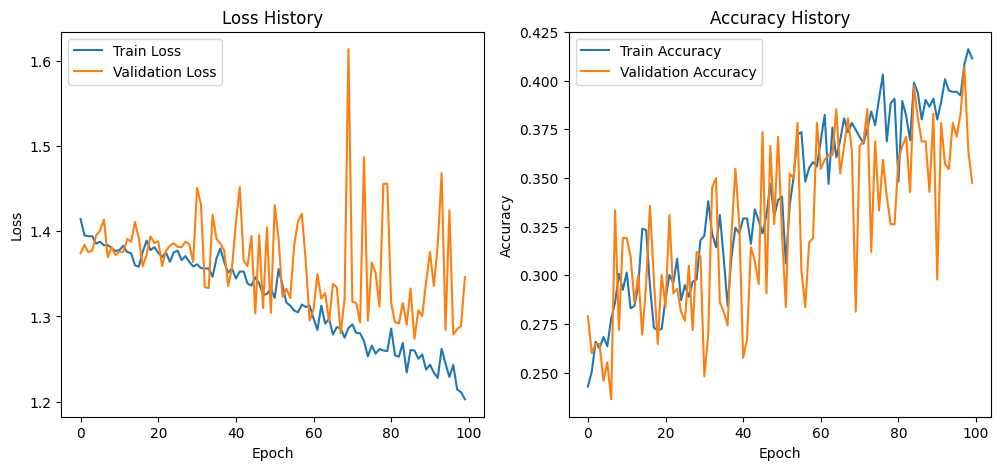

In [66]:
# need pretrained Resnet18, pleas refer to the models.py file
# for better results, try to increase the number of epochs
model = ResNetGRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

In [60]:
# #pip install torchsummary
# from torchsummary import summary


Epoch 1/100, Train Loss: 1.3882916805879124, Train Acc: 0.24054373522458627, Val Loss: 1.387715220451355, Val Acc: 0.26713947990543735
Epoch 2/100, Train Loss: 1.3865346503707598, Train Acc: 0.25, Val Loss: 1.386997103691101, Val Acc: 0.24822695035460993
Epoch 3/100, Train Loss: 1.3859764247570399, Train Acc: 0.2700945626477541, Val Loss: 1.3867216110229492, Val Acc: 0.22458628841607564
Epoch 4/100, Train Loss: 1.3851466111417086, Train Acc: 0.2730496453900709, Val Loss: 1.386687994003296, Val Acc: 0.23404255319148937
Epoch 5/100, Train Loss: 1.384470984620868, Train Acc: 0.28250591016548465, Val Loss: 1.3867580890655518, Val Acc: 0.2198581560283688
Epoch 6/100, Train Loss: 1.382840298256784, Train Acc: 0.28841607565011823, Val Loss: 1.3871644735336304, Val Acc: 0.23167848699763594
Epoch 7/100, Train Loss: 1.3821074197877128, Train Acc: 0.29609929078014185, Val Loss: 1.3872475624084473, Val Acc: 0.24349881796690306
Epoch 8/100, Train Loss: 1.3801867624498763, Train Acc: 0.2842789598108

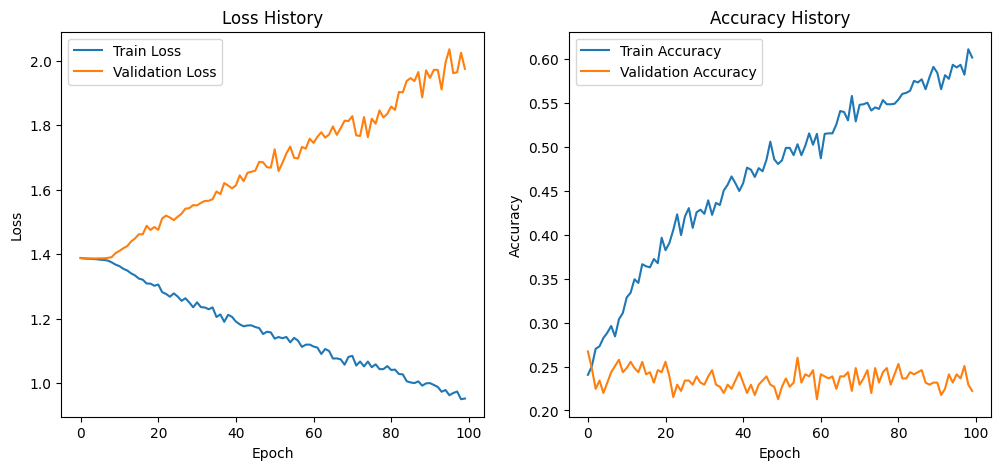

In [67]:
from models import *
input_size = X_train_valid.shape[2]  # Number of features per timestep

#model = LSTM().cuda()
model = Seq2SeqForClassification(input_size=22, hidden_size=32, num_layers=3, dropout=0.5, output_size=4).cuda()

# def print_model_summary(model):
#     print("Model's layers:")
#     for layer in model.modules():
#         print(layer)

# print_model_summary(model)

optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## RasCNN

In [62]:
#Really appreciate the help from https://github.com/cmunozcortes/c247-final-project/tree/main !

# Load the data and convert from 64 to 32 bit floats
X_train_valid = np.load("/content/drive/My Drive/247/247_project/project/X_train_valid.npy").astype(np.float32)
y_train_valid = np.load("/content/drive/My Drive/247/247_project/project/y_train_valid.npy").astype(np.float32)
X_test = np.load("/content/drive/My Drive/247/247_project/project/X_test.npy").astype(np.float32)
y_test = np.load("/content/drive/My Drive/247/247_project/project/y_test.npy").astype(np.float32)

# Swap the axes of our EEG signals so the channels are the last axis
X_train_valid = X_train_valid.transpose((0,2,1))
X_test = X_test.transpose((0,2,1))

# Split Train+Val data to Train and Val sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid,
    test_size=0.2, random_state=42)

# Print our the shapes of the data we loaded for confirmation
print ('Training data shape: {}'.format(X_train.shape))
print ('Validation data shape: {}'.format(X_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training target shape: {}'.format(y_train.shape))
print ('Validation target shape: {}'.format(y_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))

# Function to convert labels from single value class index to onehot vector
def convert_to_one_hot(in_arr):
    in_arr = in_arr.reshape((in_arr.shape[0],))
    in_arr = in_arr.astype(int)
    in_arr_1h = np.zeros((in_arr.size, in_arr.max()+1))
    in_arr_1h[np.arange(in_arr.size),in_arr] = 1
    return in_arr_1h


y_train -= 769
y_valid -= 769
y_test -= 769

y_train_1h = convert_to_one_hot(y_train)
y_valid_1h = convert_to_one_hot(y_valid)
y_test_1h = convert_to_one_hot(y_test)


Training data shape: (1692, 1000, 22)
Validation data shape: (423, 1000, 22)
Test data shape: (443, 1000, 22)
Training target shape: (1692,)
Validation target shape: (423,)
Test target shape: (443,)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 22)]        0         
                                                                 
 reshape (Reshape)           (None, 1000, 22, 1)       0         
                                                                 
 spatial_conv_0 (Conv2D)     (None, 1000, 12, 100)     1200      
                                                                 
 spatial_conv_1 (Conv2D)     (None, 1000, 1, 100)      120100    
                                                                 
 batch_normalization (Batch  (None, 1000, 1, 100)      400       
 Normalization)                                                  
                                                                 
 spatial_dropout2d (Spatial  (None, 1000, 1, 100)      0         
 Dropout2D)                                                  


Epoch 1: val_categorical_accuracy improved from -inf to 0.33806, saving model to best_rescnn.h5
27/27 - 20s - loss: 8.9287 - categorical_accuracy: 0.2600 - val_loss: 8.3333 - val_categorical_accuracy: 0.3381 - lr: 1.0000e-04 - 20s/epoch - 742ms/step
Epoch 2/250

Epoch 2: val_categorical_accuracy improved from 0.33806 to 0.35697, saving model to best_rescnn.h5
27/27 - 3s - loss: 8.6384 - categorical_accuracy: 0.2955 - val_loss: 8.1582 - val_categorical_accuracy: 0.3570 - lr: 1.0000e-04 - 3s/epoch - 113ms/step
Epoch 3/250

Epoch 3: val_categorical_accuracy improved from 0.35697 to 0.37116, saving model to best_rescnn.h5
27/27 - 3s - loss: 8.4200 - categorical_accuracy: 0.3085 - val_loss: 7.9904 - val_categorical_accuracy: 0.3712 - lr: 1.0000e-04 - 3s/epoch - 110ms/step
Epoch 4/250

Epoch 4: val_categorical_accuracy improved from 0.37116 to 0.40898, saving model to best_rescnn.h5
27/27 - 3s - loss: 8.2129 - categorical_accuracy: 0.3327 - val_loss: 7.8206 - val_categorical_accuracy: 0.409

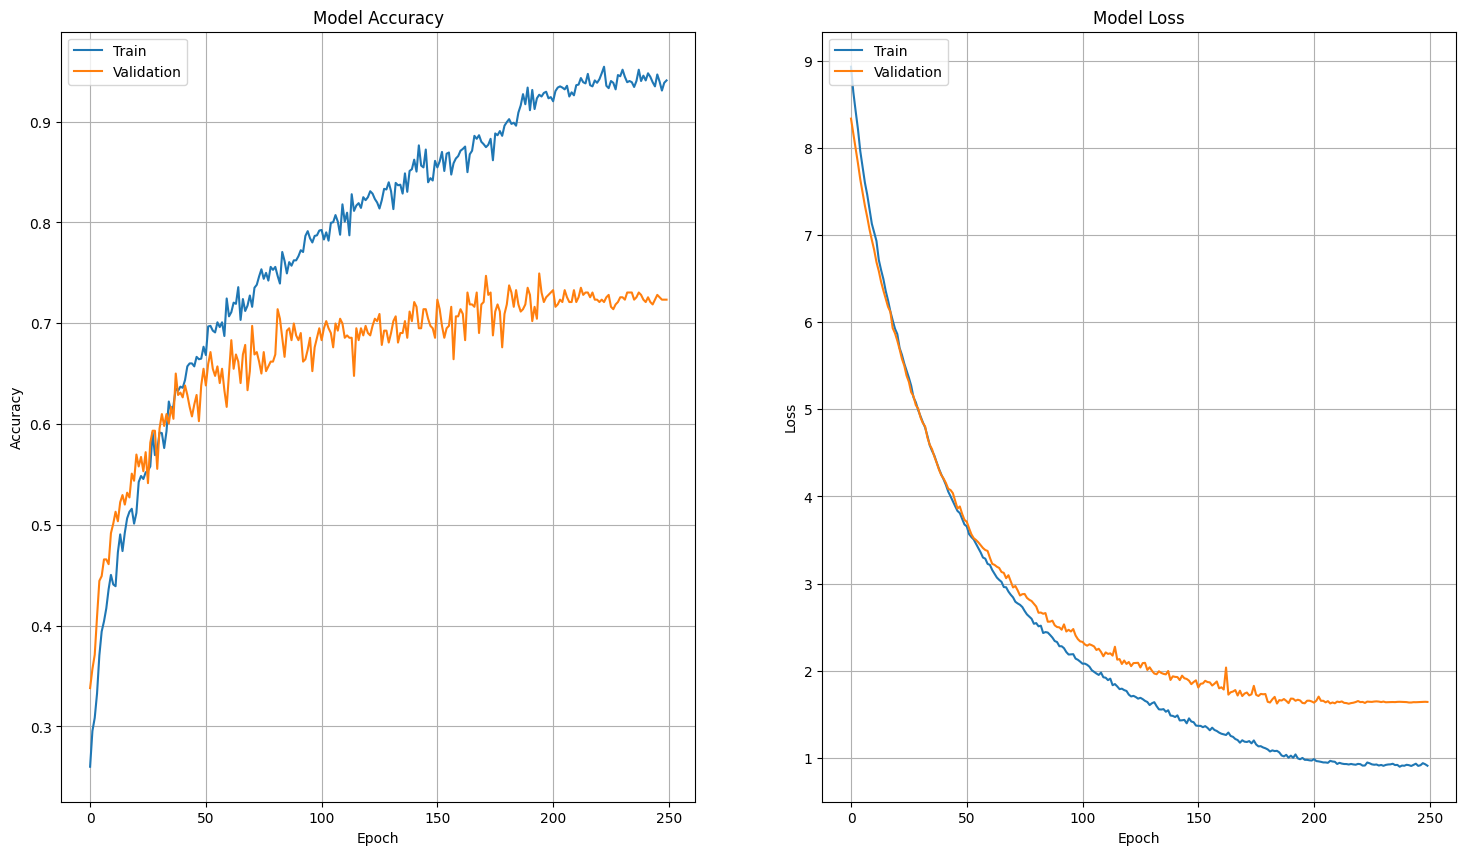

In [63]:
#Adapted from https://github.com/cmunozcortes/c247-final-project/tree/main
# parameters
from models import *
N_INPUT_CH = 22
N_PCA_COMP = 16
N_INPUT_SAMPLES = 1000
N_INPUT_SAMPLES_TRIMMED = 500
EPOCHS = 250

# compile
model = RaSCNN(inputshape=(N_INPUT_SAMPLES, N_INPUT_CH), outputshape=4)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

# train
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_rescnn.h5',
        save_best_only=True,
        verbose=True,
        monitor='val_categorical_accuracy'
    ),
]
loss_hist = model.fit(
    X_train, y_train_1h,
    validation_data=(X_valid, y_valid_1h),
    batch_size=64,
    epochs=EPOCHS,
    verbose=2,
    callbacks=callbacks,
)

# Load the best weights and evaluate model on test dataset
print("\nTest accuracy:")
print("Final iteration:", model.evaluate(X_test, y_test_1h))
model.load_weights('best_rescnn.h5')
print("Best Validation Accuracy Iteration:", model.evaluate(X_test, y_test_1h))

# Plot our loss and accuracy over time
fig, axs = plt.subplots(1,2, figsize=(18, 10))
axs[0].plot(loss_hist.history['categorical_accuracy'])
axs[0].plot(loss_hist.history['val_categorical_accuracy'])
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_title('Model Accuracy')
axs[0].legend(['Train', 'Validation'], loc='upper left')
axs[0].grid()
axs[1].plot(loss_hist.history['loss'])
axs[1].plot(loss_hist.history['val_loss'])
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(['Train', 'Validation'], loc='upper left')
axs[1].grid()
plt.show()